# Sentiment Analysis of Amazon Reviews

## Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk #natural language toolkit

## Load Dataset

In [3]:
#Read in review data
df = pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [35]:
df.shape

(10000, 14)

In [41]:
df = df.head(1000)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Score_Sentiment,Processed_Text,Polarity,Sentiment_VADER
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,bought several vitality canned dog food produc...,0.9413,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,product arrived labeled jumbo salted peanutsth...,-0.1027,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,confection around centuries light pillowy citr...,0.8073,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,looking secret ingredient robitussin believe f...,0.4404,positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,great taffy great price wide assortment yummy ...,0.9468,positive


## Data Visualisation

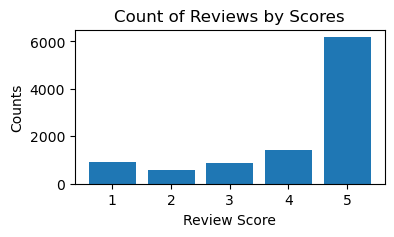

In [8]:
score_counts = df["Score"].value_counts().sort_index()
plt.figure(figsize=(4,2))
plt.bar(score_counts.index, score_counts.values)
plt.title("Count of Reviews by Scores")
plt.xlabel("Review Score")
plt.ylabel("Counts")
plt.show()

## Labelling Dataset using Score value

Positive review : Score above 3 <br>
Negative Review : Score less than equal to 3

In [36]:
df["Score_Sentiment"] = df.apply(lambda row: 'positive' if row["Score"] > 3 else 'negative', axis=1)

In [37]:
df[["Score","Score_Sentiment"]].head()

,Score,Score_Sentiment
0,5,positive
1,1,negative
2,4,positive
3,2,negative
4,5,positive


Score sentiment column will be used to check the accuracy of various models

In [14]:
df["Score_Sentiment"].value_counts()

positive    7616
negative    2384
Name: Score_Sentiment, dtype: int64

## Preprocessing

Preprocessing all individual reviews will be done using nltk library <br>
All stopwords, urls, mentions, special characters will be removed and whole text will be lowercased

In [16]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print("Some of the stopwords: ",list(stop_words)[:8])
print("Total number of stopwords:",len(stop_words))

Some of the stopwords:  ['i', 'have', 'just', 'and', 'whom', 'once', 'me', "wouldn't"]
Total number of stopwords: 179


In [17]:
import re
def preprocess_text(text):
    # convert to lowercase
    pre_text = text.lower()
    # remove urls
    pre_text = re.sub(r'http\S+', '', pre_text)
    # remove mentions
    pre_text = re.sub(r'@\w+', '', pre_text)
    # remove special characters
    pre_text = re.sub(r'[^\w\s]', '', pre_text)
    pre_text = " ".join(word for word in pre_text.split() if word not in stop_words)
    return pre_text

df['Processed_Text'] = df['Text'].apply(lambda x: preprocess_text(x))
df[["Text","Processed_Text"]].head()

,Text,Processed_Text
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


# Sentiment Analysis using 5 Models:-

## 1) Logistic Regression Classifier

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Split dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Convert text into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['Processed_Text'])
X_test = vectorizer.transform(test_df['Processed_Text'])
y_train = train_df['Score_Sentiment']
y_test = test_df['Score_Sentiment']

# Train a logistic regression model
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [19]:
from sklearn.metrics import accuracy_score

# Evaluate the performance of the model
lr_train_acc = accuracy_score(y_train, clf.predict(X_train))
lr_test_acc = accuracy_score(y_test, clf.predict(X_test))

print("Logistic Regression Train accuracy: {:.3f}".format(lr_train_acc))
print("Logistic Regression Test accuracy: {:.3f}".format(lr_test_acc))

Logistic Regression Train accuracy: 0.986
Logistic Regression Test accuracy: 0.853


### Logistic Regression Model Analysis 

In [20]:
# Extract coefficients and feature names from the trained logistic regression model
coefficients = clf.coef_[0]
feature_names = vectorizer.get_feature_names_out()

features = dict(zip(feature_names, coefficients))
print("Total number of features extracted:",len(feature_names))

Total number of features extracted: 21728


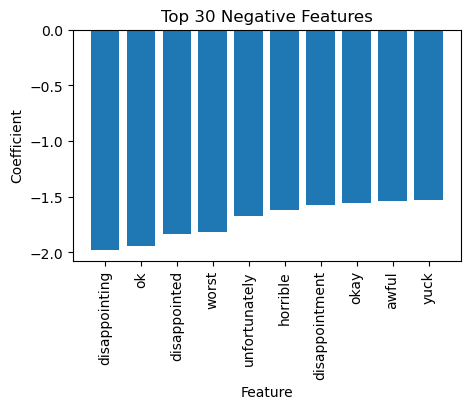

In [21]:
# Sort the dictionary by coefficient value in descending order and get the top 10 features
top_features = dict(sorted(features.items(), key=lambda item: item[1])[:10])

# Create a bar chart of the coefficients
plt.figure(figsize=(5, 3))
plt.bar(top_features.keys(),top_features.values())
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Top 30 Negative Features')
plt.show()

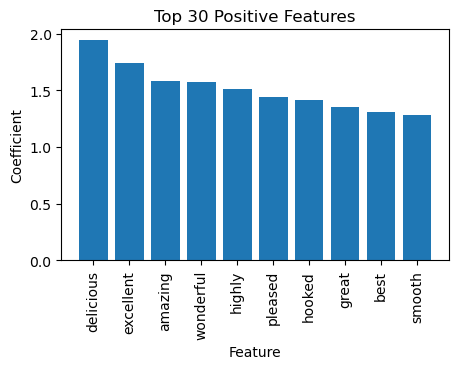

In [22]:
# Sort the dictionary by coefficient value in descending order and get the top 10 features
top_features = dict(sorted(features.items(), key=lambda item: item[1], reverse=True)[:10])

# Create a bar chart of the coefficients
plt.figure(figsize=(5, 3))
plt.bar(top_features.keys(),top_features.values())
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Top 30 Positive Features')
plt.show()

## 2) SVM Classifier

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

# Split dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Convert text into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['Processed_Text'])
X_test = vectorizer.transform(test_df['Processed_Text'])
y_train = train_df['Score_Sentiment']
y_test = test_df['Score_Sentiment']

# Train an SVM model
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [24]:
svm_train_acc = accuracy_score(y_train, clf.predict(X_train))
svm_test_acc = accuracy_score(y_test, clf.predict(X_test))

print("SVM Train accuracy: {:.3f}".format(svm_train_acc))
print("SVM Test accuracy: {:.3f}".format(svm_test_acc))

SVM Train accuracy: 0.948
SVM Test accuracy: 0.827


## 3) Decision Tree Classifier 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

# Split dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Convert text into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['Processed_Text'])
X_test = vectorizer.transform(test_df['Processed_Text'])
y_train = train_df['Score_Sentiment']
y_test = test_df['Score_Sentiment']

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
dtc_train_acc = accuracy_score(y_train, clf.predict(X_train))
dtc_test_acc = accuracy_score(y_test, clf.predict(X_test))

print("Decision Tree Classifier Train accuracy: {:.3f}".format(dtc_train_acc))
print("Decision Tree Classifier Test accuracy: {:.3f}".format(dtc_test_acc))

Decision Tree Classifier Train accuracy: 1.000
Decision Tree Classifier Test accuracy: 0.790


## 4) VADER ( Valence Aware Dictionary for Sentiment Reasoning)

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [42]:
threshold = 0
def classify_review(polarity):
    if polarity > threshold:
        return 'positive'
    else:
        return 'negative'

df['Polarity'] = df['Processed_Text'].apply(lambda x: analyzer.polarity_scores(x)["compound"]) #calculate polarity from -1 to 1
df['Sentiment_VADER'] = df['Polarity'].apply(classify_review) #classify using polarity
df[["Processed_Text","Polarity","Sentiment_VADER","Score_Sentiment"]].head()

,Processed_Text,Polarity,Sentiment_VADER,Score_Sentiment
0,bought several vitality canned dog food produc...,0.9413,positive,positive
1,product arrived labeled jumbo salted peanutsth...,-0.1027,negative,negative
2,confection around centuries light pillowy citr...,0.8073,positive,positive
3,looking secret ingredient robitussin believe f...,0.4404,positive,negative
4,great taffy great price wide assortment yummy ...,0.9468,positive,positive


In [43]:
from sklearn.metrics import accuracy_score
vader_acc = accuracy_score(df["Sentiment_VADER"], df["Score_Sentiment"])
print(f"VADER accuracy: {vader_acc:.3f}")

VADER accuracy: 0.818


## 5) BERT

In [44]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import re

In [45]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [46]:
def bert_score(text):
    tokens = tokenizer.encode(text, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1
#1 to 5 : negative to positive

In [47]:
#sentiment pipeline can only take upto 512 tokens at a time
df["Bert_Score"] = df["Text"].apply(lambda x: bert_score(x[:512]))

In [48]:
threshold = 3
def bert_classify_review(score):
    if score > threshold:
        return "positive"
    else:
        return "negative"
df["Bert_Sentiment"] = df["Bert_Score"].apply(bert_classify_review)
df[["Bert_Score","Bert_Sentiment","Score_Sentiment"]].head()

,Bert_Score,Bert_Sentiment,Score_Sentiment
0,5,positive,positive
1,1,negative,negative
2,5,positive,positive
3,5,positive,negative
4,5,positive,positive


In [58]:
from sklearn.metrics import accuracy_score
bert_acc = accuracy_score(df["Bert_Sentiment"], df["Score_Sentiment"])
print(f"BERT accuracy: {bert_acc:.3f}")

BERT accuracy: 0.877


## Comparing Accuracy of all the Models

In [50]:
data = {
    'Classifier': ['Logistic Regression', 'SVM Classifier', 'Decision Tree', 'VADER', 'BERT Classifier'],
    'Accuracy': [lr_test_acc, svm_test_acc, dtc_test_acc, vader_acc, bert_acc],
}
accuracy_df = pd.DataFrame(data)
accuracy_df

,Classifier,Accuracy
0,Logistic Regression,0.8525
1,SVM Classifier,0.8270
2,Decision Tree,0.7905
3,VADER,0.8180
4,BERT Classifier,0.8770


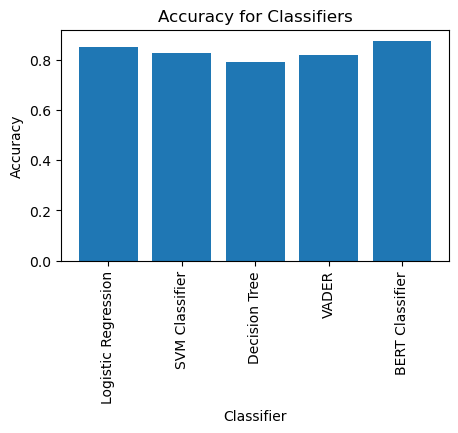

In [54]:
# Plot the bar chart
plt.figure(figsize=(5, 3))
plt.bar(accuracy_df['Classifier'], accuracy_df['Accuracy'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy for Classifiers')
plt.xticks(rotation=90)
plt.show()

In [59]:
highest_accuracy = accuracy_df['Accuracy'].max()
lowest_accuracy = accuracy_df['Accuracy'].min()

# Find classifiers with highest and lowest accuracy
highest_classifier = accuracy_df.loc[accuracy_df['Accuracy'].idxmax(), 'Classifier']
lowest_classifier = accuracy_df.loc[accuracy_df['Accuracy'].idxmin(), 'Classifier']

print(f'Highest Accuracy: {highest_accuracy} achieved by {highest_classifier}')
print(f'Lowest Accuracy: {lowest_accuracy} achieved by {lowest_classifier}')

Highest Accuracy: 0.877 achieved by BERT Classifier
Lowest Accuracy: 0.7905 achieved by Decision Tree
